In [1]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11689 sha256=4375a5bace8526d0fb00c549cade9650eb81d34dbf9cdeaf5ee529ec282e8e7a
  Stored in directory: c:\users\ramesh\appdata\local\pip\cache\wheels\15\93\6d\5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


### We are going to cluster Wikipedia articles using k-means algorithm. The steps for doing that are the following:
1. fetch some Wikipedia articles,
2. represent each article as a vector,
3. perform k-means clustering,
4. evaluate the result.

# 1. Fetch wikipedia articles

we will use the content of the articles for:
Data Science,
Artificial intelligence,
Machine Learning,
European Central Bank,
Bank,
Financial technology,
International Monetary Fund,
Basketball,
Swimming,
Tennis,

In [2]:
import pandas as pd
import wikipedia

articles =['Data Science','Artificial intelligence','Machine Learning','European Central Bank','Bank','Financial technology','International Monetary Fund','Basketball','Swimming','Tennis']
wiki_list=[]
title=[]

for article in articles:
    print("loading content: ",article)
    wiki_list.append(wikipedia.page(article).content)
    title.append(article)
print("examine content")
wiki_list

loading content:  Data Science
loading content:  Artificial intelligence
loading content:  Machine Learning
loading content:  European Central Bank
loading content:  Bank
loading content:  Financial technology
loading content:  International Monetary Fund
loading content:  Basketball
loading content:  Swimming
loading content:  Tennis
examine content


['Data science is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data. Data science is related to data mining, machine learning and big data.\nData science is a "concept to unify statistics, data analysis, machine learning, domain knowledge and their related methods" in order to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, domain knowledge and information science. Turing award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational and now data-driven) and asserted that "everything about science is changing because of the impact of information technology" and the data deluge.\n\n\n== Foundations ==\nData science is an interdisciplinary field focused on extracting knowledge from data sets, wh

### 2. Represent each article as a vector

#### Since we are going to use k-means, we need to represent each article as a numeric vector. A popular method is to use term-frequency/inverse-document-frequency (tf-idf). Put it simply, with this method for each word w and document d we calculate:
tf(w,d): the ratio of the number of appearances of w in d divided with the total number of words in d.
idf(w): the logarithm of the fraction of the total number of documents divided by the number of documents that contain w.
tfidf(w,d)=tf(w,d) x idf(w)
It is recommended that common, stop words are excluded. All the calculations are easily done with sklearn’s TfidfVectorizer.

In [3]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer(stop_words={'english'})
X =vectorizer.fit_transform(wiki_list)

In [4]:
print(vectorizer.get_feature_names())
print(X.shape)

['00', '000', '0001', '001', '008', '01', '03', '048', '05', '06', '07', '08', '10', '100', '1000', '100k', '101', '11', '110', '115', '12', '120', '12000', '122', '123', '127', '128', '129', '12th', '13', '13000', '1316', '1397', '13th', '14', '140', '1407', '141', '1472', '14th', '15', '150', '1500', '1538', '155', '1590', '1599', '16', '160', '169', '1695', '16th', '17', '1700', '1728', '177', '17th', '18', '180', '1800', '18000', '1830', '1859', '1861', '1863', '1865', '1872', '1873', '1874', '1875', '1877', '188', '1880', '1881', '1887', '189', '1890s', '1891', '1892', '1893', '1895', '1896', '1897', '1898', '1899', '18th', '19', '1900', '1901', '1904', '1905', '1906', '1907', '1908', '1910', '1913', '1915', '1917', '1920', '1920s', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1930s', '1932', '1936', '1937', '1938', '1939', '1940', '1940s', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1950s', '1951', '1952', '1953', '1954', '

In [5]:
print(X[0,])

  (0, 6640)	0.004663015291191275
  (0, 376)	0.012612281712928204
  (0, 4229)	0.008339604019022175
  (0, 2983)	0.00677062883459613
  (0, 5052)	0.012612281712928204
  (0, 2622)	0.00677062883459613
  (0, 7470)	0.006147969908933915
  (0, 5628)	0.005107448117025032
  (0, 3526)	0.00677062883459613
  (0, 1843)	0.008339604019022175
  (0, 676)	0.012612281712928204
  (0, 5016)	0.010721591713775309
  (0, 1726)	0.012612281712928204
  (0, 2241)	0.012612281712928204
  (0, 7053)	0.004663015291191275
  (0, 6027)	0.010721591713775309
  (0, 6512)	0.012612281712928204
  (0, 2295)	0.00938012581093106
  (0, 4168)	0.006147969908933915
  (0, 8169)	0.012612281712928204
  (0, 8344)	0.012612281712928204
  (0, 8711)	0.012612281712928204
  (0, 6783)	0.008339604019022175
  (0, 8627)	0.012612281712928204
  (0, 1372)	0.006147969908933915
  :	:
  (0, 5201)	0.03752050324372424
  (0, 6707)	0.01229593981786783
  (0, 8469)	0.010721591713775309
  (0, 7721)	0.007489435811778166
  (0, 4999)	0.0186520611647651
  (0, 3545)	0.

### 3.Perform K-Means clustering
Each row of variable X is a vector representation of a Wikipedia article. Hence, we can use X as input for the k-means algorithm.
First, we must decide on the number of clusters. Here, we will use the elbow method.

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

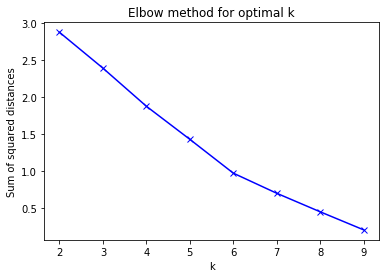

In [8]:
Sum_of_squared_distances=[]
K= range(2,10)
for k in K:
    km=KMeans(n_clusters=k,max_iter=200,n_init=10)
    km =km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal k')
plt.show()

##### The plot is almost a straight line, probably because we have  few articles. But at a closer examination a dent appears for k=4 or k=6. We will try to cluster into 6 groups.

In [10]:
true_k =6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)

model.fit(X)
labels=model.labels_
wiki_cluster=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cluster.sort_values(by=['cluster']))

                         title  cluster
1      Artificial intelligence        0
2             Machine Learning        0
3        European Central Bank        1
4                         Bank        1
6  International Monetary Fund        1
0                 Data Science        2
7                   Basketball        3
9                       Tennis        3
8                     Swimming        4
5         Financial technology        5


### 4. Evaluate the result

##### Since we have used only 10 articles, it is fairly easy to evaluate the clustering just by examining what articles are contained in each cluster. That would be difficult for a large corpus. A nice way is to create a word cloud from the articles of each cluster.

In [14]:
!pip install wordcloud

cluster: 0
Titles
 Artificial intelligence
        Machine Learning


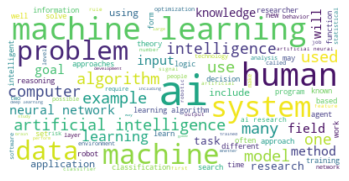

cluster: 1
Titles
       European Central Bank
                        Bank
 International Monetary Fund


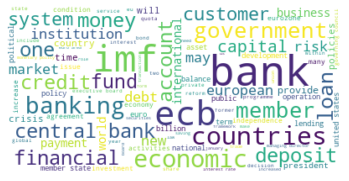

cluster: 2
Titles
 Data Science


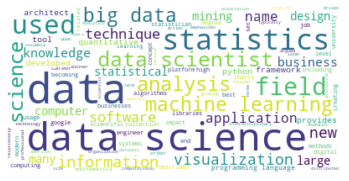

cluster: 3
Titles
 Basketball
     Tennis


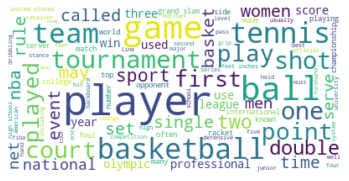

cluster: 4
Titles
 Swimming


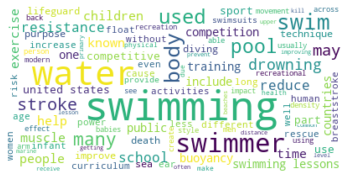

cluster: 5
Titles
 Financial technology


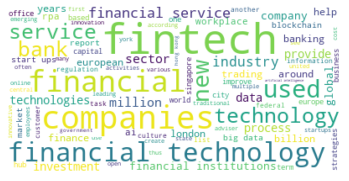

In [16]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_list}
result =pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud=WordCloud(max_font_size=50,max_words=100,background_color='white').generate(text)
    print('cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cluster[wiki_cluster.cluster ==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation ='bilinear')
    plt.axis('off')
    plt.show()

###
Cluster 0 consists of articles on European Central Bank, Bank and International Monetary Fund.
Cluster 1 consists of articles on Artificial intelligence and Machine Learning.
Cluster 2 has an article for Swimming.
Cluster 3 has an article for Data Science.
Cluster 4 has articles on Basketball and Tennis.
Cluster 5 has an article on Financial Technology.

##### It might seem odd that swimming is not in the same cluster as basketball and tennis. Or that AI and Machine Learning are not in the same group with Data Science. That is because we choose to create 6 clusters. But by looking at the word clouds we can see that articles on basket and tennis have words like game, player, team, ball in common while the article on swimming does not.